In [1]:
import polars as pl
import matplotlib.pyplot as plt
from event_detection_ap_score import event_detection_ap

import pandas as pd

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-zsrq53q2 because the default path (/home/matmozaur/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
BASE_PATH = '/home/matmozaur/Downloads/child-mind-institute-detect-sleep-states/'

In [3]:
x_train = pl.read_parquet(BASE_PATH+'train_series.parquet', n_rows=10000000)
y_train = pl.read_csv(BASE_PATH+'train_events.csv')

In [4]:
# x_train['series_id'].unique()

In [5]:
# y_train['series_id'].unique()

In [6]:
y = y_train.filter(pl.col("series_id") == '12d01911d509').to_pandas()

x = x_train.filter(pl.col("series_id") == '12d01911d509').to_pandas()

x['timestamp'] = pd.to_datetime(x['timestamp'])
y['timestamp'] = pd.to_datetime(y['timestamp'])
x.set_index('timestamp', inplace=True)
y.set_index('timestamp', inplace=True)

y = y.dropna()

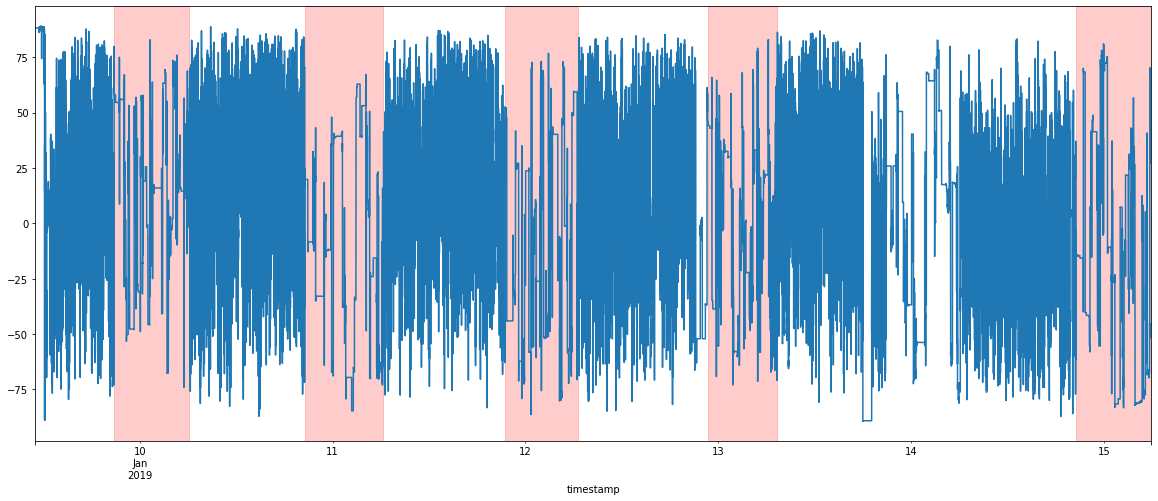

In [7]:
x[:100000]['anglez'].plot(figsize=(20,8))
for a, b in zip(y[y['event']=='onset'].index, y[y['event']=='wakeup'].index):
    plt.axvspan(a, b,alpha=0.2, color='r')

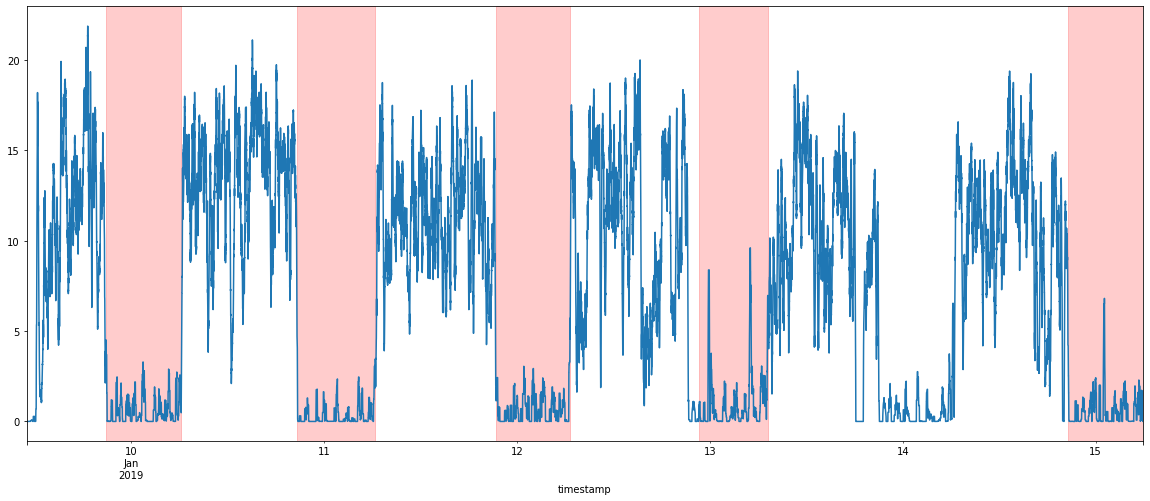

In [8]:
x[:100000]['anglez'].diff().abs().rolling('10min').mean().plot(figsize=(20,8))
for a, b in zip(y[y['event']=='onset'].index, y[y['event']=='wakeup'].index):
    plt.axvspan(a, b,alpha=0.2, color='r')

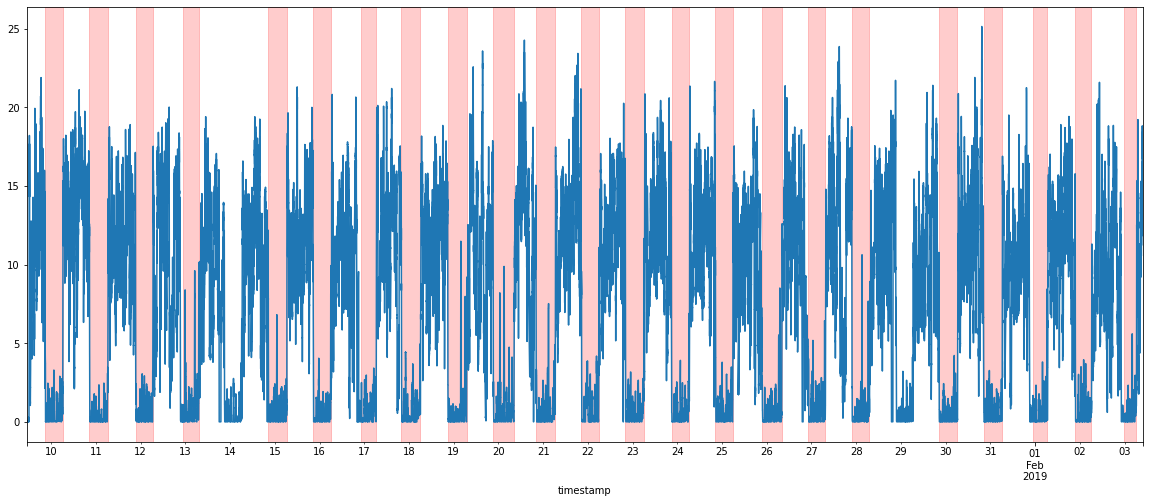

In [9]:
x['anglez'].diff().abs().rolling('10min').mean().plot(figsize=(20,8))
for a, b in zip(y[y['event']=='onset'].index, y[y['event']=='wakeup'].index):
    plt.axvspan(a, b,alpha=0.2, color='r')

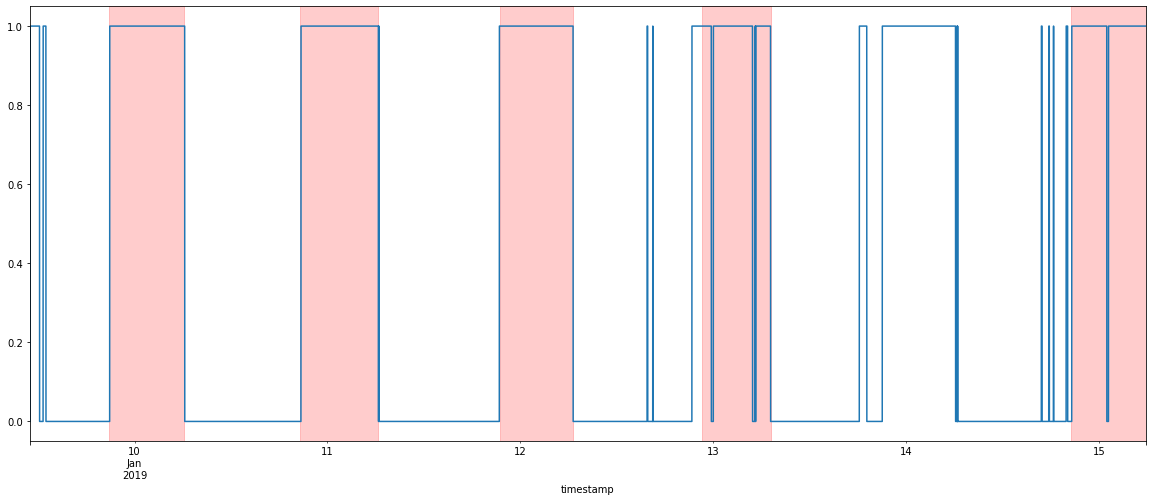

In [10]:
t = x[:100000]['anglez'].diff().abs().rolling('15min').mean() < 3
# t.astype(int).rolling('45min').max().rolling('60min').min().plot(figsize=(20,8))
t.astype(int).plot(figsize=(20,8))
for a, b in zip(y[y['event']=='onset'].index, y[y['event']=='wakeup'].index):
    plt.axvspan(a, b,alpha=0.2, color='r')

In [11]:
t = x[:100000]['anglez'].diff().abs().rolling('15min').mean() < 3
t2 = t.astype(int).diff()[2:]
t2 = t2[t2[t2==1].index[0]:]

In [12]:
list(range(18, 25)) + list(range(0, 2))

[18, 19, 20, 21, 22, 23, 24, 0, 1]

In [13]:
# for a, b in zip(t2[t2==1].index, t2[t2==-1].index):
#     if a.hour in list(range(18, 25)) + list(range(0, 2)):
#         print(a, b)

In [14]:
last = t2.index[0] - pd.Timedelta('24h')
rows = []
i = 0 
for a in t2[t2==1].index:
    if a.hour in list(range(19, 25)) + list(range(0, 2)) and a > last + pd.Timedelta('12h'):
        b = t2[a:a+pd.Timedelta('14h')][t2==-1].index[-1]
        last = a
        d1 = x.loc[a][['series_id', 'step']].to_dict()
        d1['row_id'] = i
        i += 1
        d1['event'] = 'onset'
        d1['score'] = 1
        rows.append(d1)
        d2 = x.loc[b][['series_id', 'step']].to_dict()
        d2['row_id'] = i
        i += 1
        d2['event'] = 'wakeup'
        d2['score'] = 1
        rows.append(d2)
        



pd.DataFrame.from_records(rows)

,series_id,step,row_id,event,score
0,12d01911d509,7131,0,onset,1
1,12d01911d509,13853,1,wakeup,1
2,12d01911d509,24271,2,onset,1
3,12d01911d509,31254,3,wakeup,1
4,12d01911d509,42046,4,onset,1
5,12d01911d509,48655,5,wakeup,1
6,12d01911d509,59301,6,onset,1
7,12d01911d509,66348,7,wakeup,1
8,12d01911d509,76359,8,onset,1
9,12d01911d509,83110,9,wakeup,1


In [20]:
y

,series_id,night,event,step
timestamp,,,,
2019-01-09 20:48:00-05:00,12d01911d509,1,onset,7056.0
2019-01-10 06:11:00-05:00,12d01911d509,1,wakeup,13812.0
2019-01-10 20:33:00-05:00,12d01911d509,2,onset,24156.0
2019-01-11 06:18:00-05:00,12d01911d509,2,wakeup,31176.0
2019-01-11 21:26:00-05:00,12d01911d509,3,onset,42072.0
2019-01-12 06:33:00-05:00,12d01911d509,3,wakeup,48636.0
2019-01-12 22:41:00-05:00,12d01911d509,4,onset,60252.0
2019-01-13 07:15:00-05:00,12d01911d509,4,wakeup,66420.0
2019-01-14 20:30:00-05:00,12d01911d509,6,onset,93240.0


In [17]:
x_test = pl.read_parquet(BASE_PATH+'test_series.parquet')
y_sample = pl.read_csv(BASE_PATH+'sample_submission.csv')

In [18]:
# x_test

In [21]:
y_sample

row_id,series_id,step,event,score
i64,str,i64,str,f64
0,"""038441c925bb""",100,"""onset""",0.0
1,"""038441c925bb""",105,"""wakeup""",0.0
2,"""03d92c9f6f8a""",80,"""onset""",0.5
3,"""03d92c9f6f8a""",110,"""wakeup""",0.5
4,"""0402a003dae9""",90,"""onset""",1.0
5,"""0402a003dae9""",120,"""wakeup""",1.0
